In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





In [2]:
data = pd.read_csv('emotions.csv')

In [3]:
eeg_data = data[['# mean_0_a']]

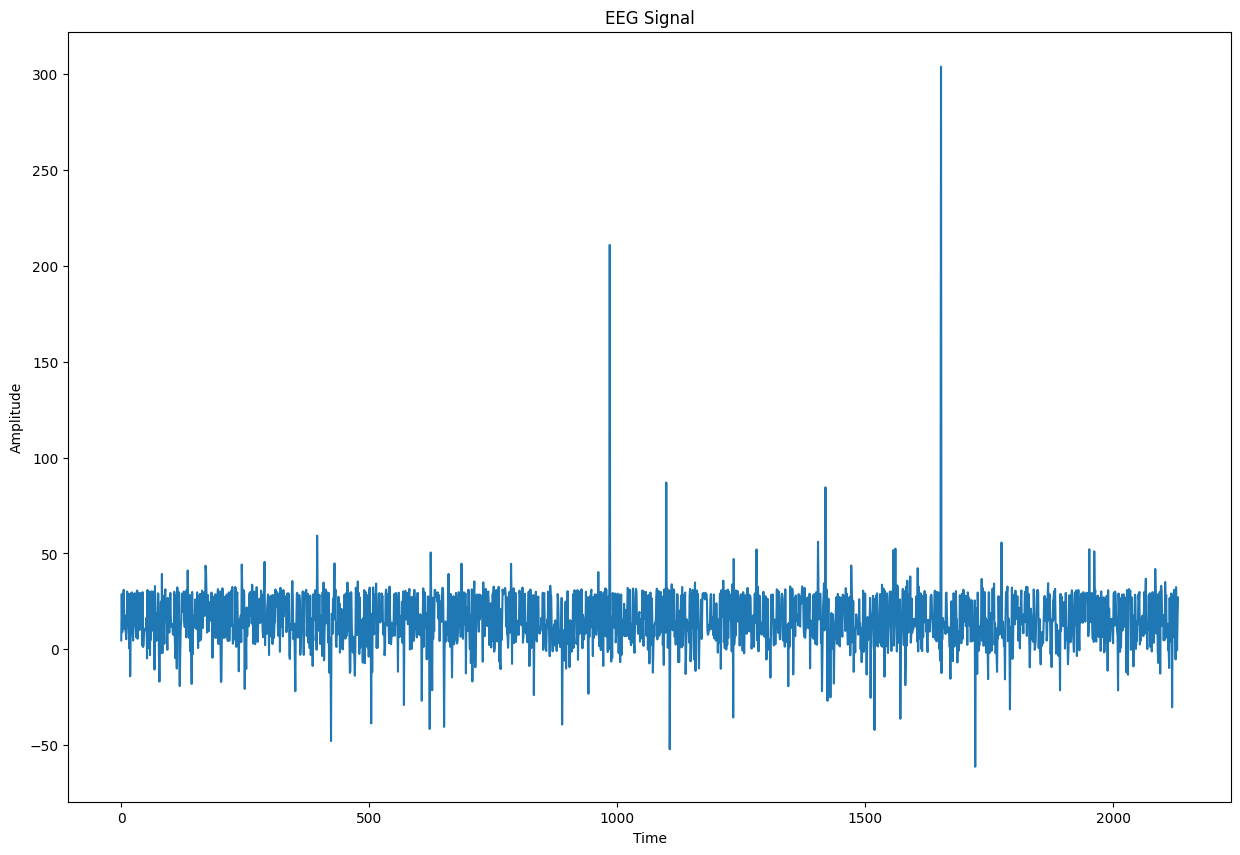

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(eeg_data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('EEG Signal')
plt.show()
